# Import Library

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Getting data from Raw Housing 

In [78]:
data = pd.read_csv('Raw_Housing_Prices.csv')
data.describe()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.161300e+04,2.160900e+04,21613.000000,21609.000000,21604.000000,2.160400e+04,21613.000000,21613.000000,21610.000000,21613.000000,21613.000000,21613.000000,21612.000000,21612.000000,21612.000000,21612.000000,21613.000000
mean,4.580302e+09,5.401984e+05,3.370842,2.114732,2079.931772,1.510776e+04,1.494309,7.623467,1788.344193,291.509045,46.994864,84.402258,98077.937766,47.560048,-122.213892,1986.538914,12768.455652
std,2.876566e+09,3.673890e+05,0.930062,0.770138,918.487597,4.142827e+04,0.539989,1.105439,827.982604,442.575043,29.373411,401.679240,53.505425,0.138565,0.140830,685.404255,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,3.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,21.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,7.000000,1560.000000,0.000000,43.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,8.000000,2210.000000,560.000000,67.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,10.000000,9410.000000,4820.000000,118.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Pre Processing

In [79]:
q1 = data['Sale Price'].quantile(0.25)
q3 = data['Sale Price'].quantile(0.75)
iqr = q3-q1
upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr
upper_limit,lower_limit

(1129575.0, -162625.0)

In [80]:
def limit(value):
    if value>upper_limit:
        return upper_limit
    elif value<lower_limit:
        return lower_limit
    else:
        return value
data['Sale Price'] = data['Sale Price'].apply(limit)
data['Sale Price'].describe()

count    2.160900e+04
mean     5.116186e+05
std      2.500620e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: Sale Price, dtype: float64

In [81]:
data.dropna(inplace=True,axis=0,subset=["Sale Price"])
data["Sale Price"].isnull().sum()

0

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [83]:
from sklearn.impute import SimpleImputer
numeric_columns = ['No of Bathrooms','Flat Area (in Sqft)','Lot Area (in Sqft)',
                   'Area of the House from Basement (in Sqft)','Latitude','Longitude',
                   'Living Area after Renovation (in Sqft)','Zipcode']
imp = SimpleImputer(missing_values=np.nan,strategy='median')
data[numeric_columns]=imp.fit_transform(data[numeric_columns])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [84]:
data['Waterfront View'].unique()

array(['No', 'Yes'], dtype=object)

In [85]:
data['Waterfront View'] = data['Waterfront View'].map({'No':0,'Yes':1})
data['Waterfront View'].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='Condition of the House'>

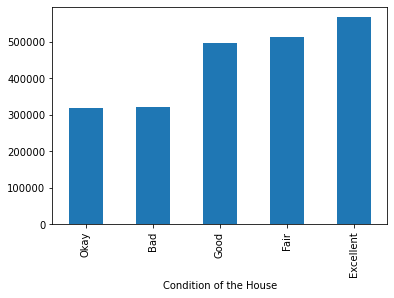

In [86]:
data.groupby('Condition of the House')['Sale Price'].mean().sort_values().plot(kind='bar')

<AxesSubplot:xlabel='Condition of the House'>

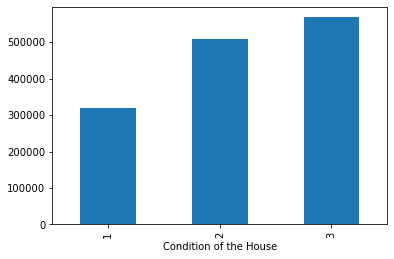

In [87]:
data['Condition of the House'] = data['Condition of the House'].map({'Excellent':3,'Fair':2,'Good':2,'Okay':1,'Bad':1})
data.groupby('Condition of the House')['Sale Price'].mean().plot(kind='bar')

In [88]:
data['No of Times Visited'] = data['No of Times Visited'].map({'None':0,'Once':1,'Twice':2,'Thrice':3,'Four':4})

In [89]:
data['Ever Renovated'] = np.where(data['Renovated Year']==0,'NO','YES')
data['Purchase Year'] = pd.DatetimeIndex(data['Date House was Sold']).year
data['Years Since Renovation']=np.where(data['Ever Renovated']=='YES',data['Purchase Year']-data['Renovated Year'],0)
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Purchase Year,Years Since Renovation
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,0,0,...,63,0,98178.0,47.5112,-122.257,1340.0,5650,NO,2017,0
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,0,0,...,67,1991,98125.0,47.7210,-122.319,1690.0,7639,YES,2017,26
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,0,0,...,85,0,98028.0,47.7379,-122.233,2720.0,8062,NO,2016,0
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,0,0,...,53,0,98136.0,47.5208,-122.393,1360.0,5000,NO,2017,0
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,0,0,...,31,0,98074.0,47.6168,-122.045,1800.0,7503,NO,2016,0


In [90]:
data.drop(columns=['Ever Renovated','Renovated Year','Purchase Year','Date House was Sold'],inplace=True)
data.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,0,0,2,7,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,0,0,2,7,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,26
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,0,0,2,6,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,0,0,3,7,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,0,0,2,8,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,0


In [91]:
from sklearn.preprocessing import StandardScaler
data.dropna(inplace=True)
scaler = StandardScaler()
y = data['Sale Price']
t = data.drop(columns=['Sale Price','ID'])
x = scaler.fit_transform(t)
X = pd.DataFrame(data = x, columns = t.columns)
X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation
0,-0.398724,-1.447526,-0.979905,-0.228291,-0.915389,-0.087181,-0.30579,-0.240418,-0.563993,-0.734722,-0.658697,0.544734,1.870134,-0.352576,-0.306226,-0.943307,-0.260741,-0.167463
1,-0.398724,0.175684,0.533718,-0.189858,0.936817,-0.087181,-0.30579,-0.240418,-0.563993,0.460990,0.245134,0.680915,0.879570,1.161645,-0.746479,-0.432664,-0.187900,4.757239
2,-1.474115,-1.447526,-1.426369,-0.123276,-0.915389,-0.087181,-0.30579,-0.240418,-1.468566,-1.229916,-0.658697,1.293731,-0.933349,1.283619,-0.135806,1.070082,-0.172409,-0.167463
3,0.676667,1.149611,-0.130534,-0.243983,-0.915389,-0.087181,-0.30579,3.225353,-0.563993,-0.891735,1.397518,0.204281,1.085159,-0.283288,-1.271941,-0.914127,-0.284546,-0.167463
4,-0.398724,-0.148958,-0.435436,-0.169628,-0.915389,-0.087181,-0.30579,-0.240418,0.340581,-0.130827,-0.658697,-0.544715,-0.073614,0.409587,1.199152,-0.272177,-0.192880,-0.167463


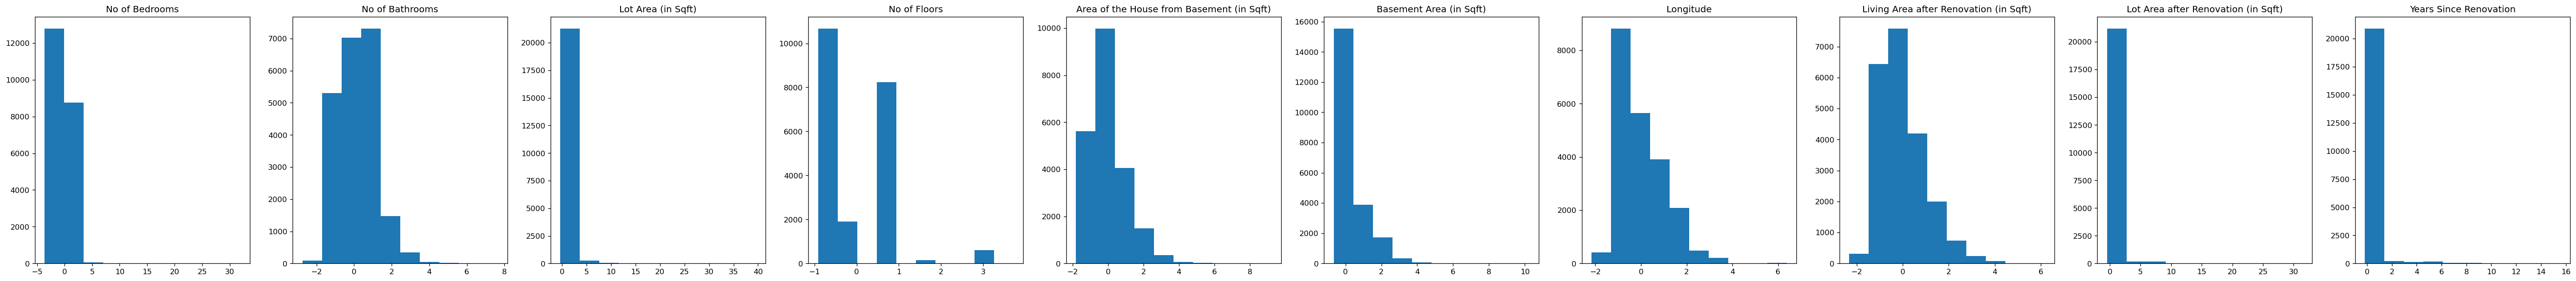

In [92]:
def distribution(data ,var):
  plt.figure(figsize = (len(var)*6,6), dpi = 120)
  for j,i in enumerate(var):
    plt.subplot(1,len(var),j+1)
    plt.hist(data[i])
    plt.title(i)

numerical_columns = ['No of Bedrooms', 'No of Bathrooms', 'Lot Area (in Sqft)',
       'No of Floors',
       'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
        'Longitude',
       'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)',
       'Years Since Renovation']
distribution(X,numerical_columns)

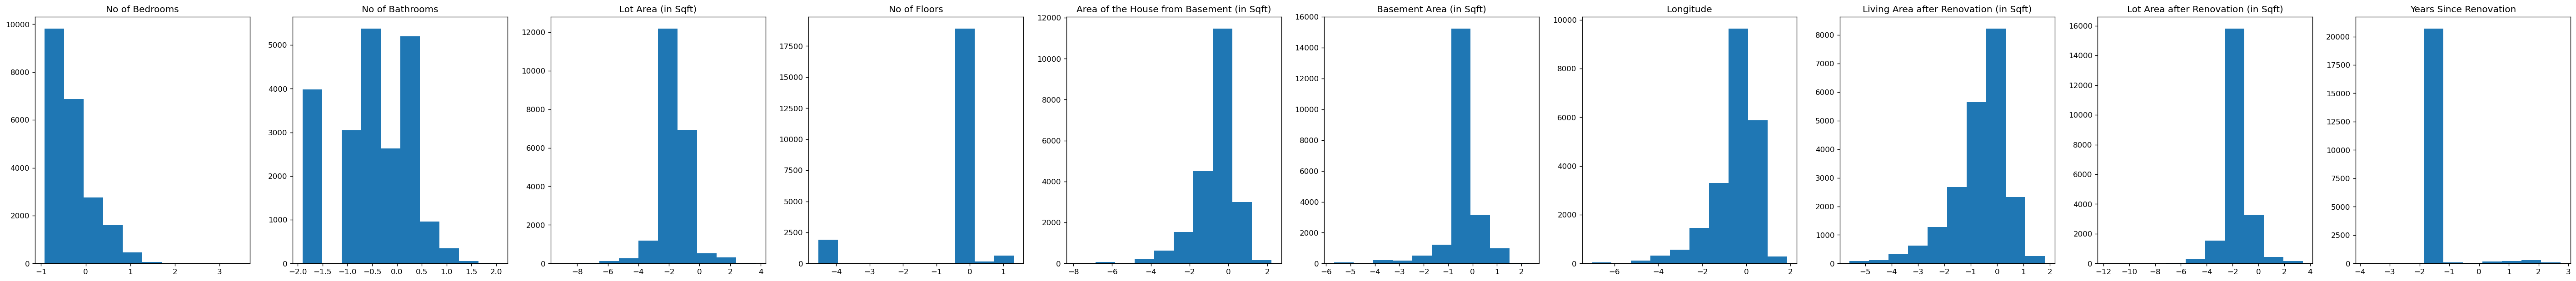

In [93]:
def right_skew(v):
    return np.log(abs(v))

for i in numerical_columns:
    X[i] = X[i].map(right_skew)
    
distribution(X,numerical_columns)

In [94]:
X.corr()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation
No of Bedrooms,1.000000,0.239108,0.127594,0.011793,-0.017654,0.024617,0.056246,-0.002673,-0.019317,0.188263,0.119385,0.124291,0.097013,0.083921,-0.004486,0.097283,0.019118,0.031489
No of Bathrooms,0.239108,1.000000,0.097343,0.025402,-0.036246,0.040905,0.085507,-0.042812,-0.002131,0.269845,0.031257,0.106154,0.104951,0.042951,-0.002254,0.210945,0.013626,0.013635
Flat Area (in Sqft),0.127594,0.097343,1.000000,-0.005588,0.057889,0.103841,0.284678,0.007678,0.705725,0.194546,0.352701,-0.318146,-0.199384,0.052538,-0.059030,0.156768,-0.006093,0.047505
Lot Area (in Sqft),0.011793,0.025402,-0.005588,1.000000,-0.046990,-0.017351,-0.033445,-0.020653,0.004212,0.041910,-0.062975,-0.043466,0.057646,0.006885,0.198576,0.011324,0.667093,0.001915
No of Floors,-0.017654,-0.036246,0.057889,-0.046990,1.000000,-0.010263,-0.002735,-0.103978,0.139062,0.113395,0.011066,-0.403615,-0.125716,-0.048730,-0.037131,0.026828,-0.051160,-0.043232
Waterfront View,0.024617,0.040905,0.103841,-0.017351,-0.010263,1.000000,0.401856,0.012406,0.070332,0.021426,0.046258,0.026149,0.030289,-0.014275,-0.011606,0.043667,-0.012569,0.110022
No of Times Visited,0.056246,0.085507,0.284678,-0.033445,-0.002735,0.401856,1.000000,0.037401,0.223661,0.010463,0.150983,0.053395,0.084840,0.006162,-0.000178,0.093946,-0.030452,0.108563
Condition of the House,-0.002673,-0.042812,0.007678,-0.020653,-0.103978,0.012406,0.037401,1.000000,-0.041292,-0.046261,0.097202,0.200857,0.046162,0.030491,-0.018458,-0.004967,-0.009272,-0.015930
Overall Grade,-0.019317,-0.002131,0.705725,0.004212,0.139062,0.070332,0.223661,-0.041292,1.000000,0.128440,0.123908,-0.456711,-0.185855,0.111226,-0.009700,0.157087,0.000935,-0.000740
Area of the House from Basement (in Sqft),0.188263,0.269845,0.194546,0.041910,0.113395,0.021426,0.010463,-0.046261,0.128440,1.000000,-0.043013,-0.059540,0.024582,0.042636,0.023964,0.301865,0.037156,-0.020458


In [95]:
"""Checking correlation if greater than 0.5"""
K = X.corr()
z = [[str(i),str(j)] for i in K.columns for j in K.columns if(K.loc[i,j]>abs(0.5) and i!=j)]
z,len(z)

([['Flat Area (in Sqft)', 'Overall Grade'],
  ['Lot Area (in Sqft)', 'Lot Area after Renovation (in Sqft)'],
  ['Overall Grade', 'Flat Area (in Sqft)'],
  ['Lot Area after Renovation (in Sqft)', 'Lot Area (in Sqft)']],
 4)

In [96]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = X[:]

## Calculating VIF for every column
VIF = pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index = X.columns)
VIF

No of Bedrooms                               1.736717
No of Bathrooms                              1.646108
Flat Area (in Sqft)                          2.540105
Lot Area (in Sqft)                           7.250882
No of Floors                                 1.385740
Waterfront View                              1.198045
No of Times Visited                          1.363173
Condition of the House                       1.063381
Overall Grade                                2.465886
Area of the House from Basement (in Sqft)    1.693385
Basement Area (in Sqft)                      1.545164
Age of House (in Years)                      1.898025
Zipcode                                      1.353827
Latitude                                     1.148378
Longitude                                    1.469600
Living Area after Renovation (in Sqft)       1.550441
Lot Area after Renovation (in Sqft)          6.796440
Years Since Renovation                       4.219316
dtype: float64

In [97]:
def MC_remover(data):
  vif = pd.Series([variance_inflation_factor(data.values, i) for i in range(data.shape[1])], index = data.columns)
  if vif.max() > 5:
    print(vif[vif == vif.max()].index[0],'has been removed')
    data = data.drop(columns = [vif[vif == vif.max()].index[0]])
    return data
  else:
    print('No Multicollinearity present anymore')
    return data

for i in range(7):
  vif_data = MC_remover(vif_data)

vif_data.head()

Lot Area (in Sqft) has been removed
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore


,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation
0,-0.919485,0.369856,-0.979905,-0.088407,-0.087181,-0.30579,-0.240418,-0.563993,-0.308263,-0.417491,0.544734,1.870134,-0.352576,-1.183431,-0.058364,-1.344226,-1.786993
1,-0.919485,-1.739066,0.533718,-0.065267,-0.087181,-0.30579,-0.240418,-0.563993,-0.774379,-1.405952,0.680915,0.879570,1.161645,-0.292388,-0.837793,-1.671846,1.559668
2,0.388058,0.369856,-1.426369,-0.088407,-0.087181,-0.30579,-0.240418,-1.468566,0.206946,-0.417491,1.293731,-0.933349,1.283619,-1.996527,0.067735,-1.757887,-1.786993
3,-0.390576,0.139423,-0.130534,-0.088407,-0.087181,-0.30579,3.225353,-0.563993,-0.114586,0.334698,0.204281,1.085159,-0.283288,0.240544,-0.089786,-1.256861,-1.786993
4,-0.919485,-1.904093,-0.435436,-0.088407,-0.087181,-0.30579,-0.240418,0.340581,-2.033877,-0.417491,-0.544715,-0.073614,0.409587,0.181615,-1.301303,-1.645685,-1.786993


In [98]:
column = data["Zipcode"].values.reshape(-1,1)
column.shape

(21609, 1)

In [99]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
data['Zipcode'] = imputer.fit_transform(column)

# Splliting Dataset

In [100]:
from sklearn.model_selection import train_test_split
X = vif_data
Y = data['Sale Price']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=101)

In [101]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True)
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
lr.score(x_test,y_test)

0.7420559897462347